In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
from datetime import date

np.set_printoptions(suppress=True)

import os
root=os.path.abspath(os.curdir)

# Data checking

In [3]:
df = pd.read_excel('raw transaction test data.xlsx') #load the data

In [4]:
print("Columns name")
print("="*20)
print(df.columns)

Columns name
Index(['Customer code', 'Vehicle code', 'date_service', 'value_scaled'], dtype='object')


In [5]:
print("Data head")
print("="*20)
print(df.head)

Data head
<bound method NDFrame.head of         Customer code  Vehicle code date_service  value_scaled
0              107444          4349   2017-05-24     -0.142181
1              107444          4349   2017-12-12      0.089364
2              107444          4349   2017-12-12     -0.219370
3              107444          4349   2017-05-24      4.590631
4              107444          4349   2017-05-24     -0.219370
...               ...           ...          ...           ...
329142         207018        243666   2019-12-13     -0.143333
329143         206181        243674   2019-12-30     -0.255510
329144         206181        243674   2019-12-30     -0.243733
329145         135552        243862   2019-12-18     -0.111130
329146         206445        244493   2019-12-17      0.132995

[329147 rows x 4 columns]>


In [6]:
print("Check Nan")
print("="*20)
print(df.isna().sum())

Check Nan
Customer code    0
Vehicle code     0
date_service     0
value_scaled     0
dtype: int64


In [7]:
print("Data summary")
print("="*20)
df.describe()

Data summary


,Customer code,Vehicle code,value_scaled
count,329147.000000,329147.000000,3.291470e+05
mean,139424.613103,197762.240637,-1.043006e-14
std,49493.217596,28506.454912,1.000000e+00
min,2.000000,4349.000000,-4.047112e+01
25%,110738.000000,186519.000000,-2.569366e-01
50%,151850.000000,203312.000000,-2.207079e-01
75%,177557.000000,216613.000000,1.025128e-02
max,209973.000000,244493.000000,9.808896e+01


In [8]:
print("Data types")
print("="*20)
print(df.dtypes)

Data types
Customer code             int64
Vehicle code              int64
date_service     datetime64[ns]
value_scaled            float64
dtype: object


## +++++++++++++++++

# Calculate R

In [9]:
date_4_8 = np.datetime64('2020-08-04')
df['R']=df['date_service'].apply(lambda x: date_4_8 - x)
df

,Customer code,Vehicle code,date_service,value_scaled,R
0,107444,4349,2017-05-24,-0.142181,1168 days
1,107444,4349,2017-12-12,0.089364,966 days
2,107444,4349,2017-12-12,-0.219370,966 days
3,107444,4349,2017-05-24,4.590631,1168 days
4,107444,4349,2017-05-24,-0.219370,1168 days
...,...,...,...,...,...
329142,207018,243666,2019-12-13,-0.143333,235 days
329143,206181,243674,2019-12-30,-0.255510,218 days
329144,206181,243674,2019-12-30,-0.243733,218 days
329145,135552,243862,2019-12-18,-0.111130,230 days


In [10]:
group_df = (df.groupby(['Customer code']))

In [11]:
R = group_df['R'].min()
R

Customer code
2         218 days
353       235 days
412       341 days
1067     1226 days
1072      426 days
            ...   
209788    221 days
209821    217 days
209850    217 days
209851    569 days
209973    236 days
Name: R, Length: 34481, dtype: timedelta64[ns]

# Calculate F

In [12]:
F = group_df.size()
F

Customer code
2         1540
353         11
412          1
1067         3
1072         3
          ... 
209788       3
209821       2
209850       1
209851       1
209973       2
Length: 34481, dtype: int64

# Calculate M

In [13]:
group_df['value_scaled'].sum()

Customer code
2        -136.327942
353         2.745761
412        -0.220708
1067        0.183986
1072       -0.666124
             ...    
209788     -0.545189
209821     -0.498428
209850     -0.021952
209851     -0.101221
209973     -0.498416
Name: value_scaled, Length: 34481, dtype: float64

In [14]:
group_df['date_service'].nunique()

Customer code
2         436
353        10
412         1
1067        1
1072        2
         ... 
209788      1
209821      1
209850      1
209851      1
209973      1
Name: date_service, Length: 34481, dtype: int64

In [15]:
M = (group_df['value_scaled'].sum())/(group_df['date_service'].nunique())
M

Customer code
2        -0.312679
353       0.274576
412      -0.220708
1067      0.183986
1072     -0.333062
            ...   
209788   -0.545189
209821   -0.498428
209850   -0.021952
209851   -0.101221
209973   -0.498416
Length: 34481, dtype: float64

In [16]:
RFM_df = pd.concat([R,F,M], axis=1)
RFM_df=RFM_df.rename(columns={0: "F", 1: "M"})
RFM_df['R']=RFM_df['R'].dt.days.astype('int16')
RFM_df

RFM_df.to_csv(os.path.join(root,'RFM_df.csv'),index=True)


In [17]:
RFM_df.describe()

,R,F,M
count,34481.000000,34481.000000,34481.000000
mean,567.214669,9.545750,-0.037446
std,298.918382,12.615115,1.131535
min,217.000000,1.000000,-2.815254
25%,319.000000,3.000000,-0.428712
50%,480.000000,7.000000,-0.247156
75%,742.000000,13.000000,-0.000755
max,1310.000000,1540.000000,97.797440


# ++++++++++++++++++++++++++++++

# Calculate K-means

## 1. K-means

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
#import seaborn as sns

Number of cluster : 1
sum of squared estimate of errors : 3086395150.3352976
Number of cluster : 2
sum of squared estimate of errors : 802140687.5860764
Number of cluster : 3
sum of squared estimate of errors : 323797029.63049287
Number of cluster : 4
sum of squared estimate of errors : 200306669.02938125
Number of cluster : 5
sum of squared estimate of errors : 120346204.54656136
Number of cluster : 6
sum of squared estimate of errors : 89650362.94075577
Number of cluster : 7
sum of squared estimate of errors : 65389239.00913702
Number of cluster : 8
sum of squared estimate of errors : 51344284.40772194
Number of cluster : 9
sum of squared estimate of errors : 41583355.87655824
Number of cluster : 10
sum of squared estimate of errors : 34146873.405271806
Number of cluster : 11
sum of squared estimate of errors : 29221403.567074303
Number of cluster : 12
sum of squared estimate of errors : 25090014.383663464
Number of cluster : 13
sum of squared estimate of errors : 22217643.232593387


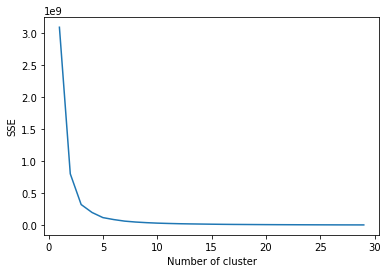

In [20]:
sse = {}
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=172).fit(RFM_df)
    print('Number of cluster :',k)
    sse[k] = kmeans.inertia_ 
    print('sum of squared estimate of errors :',sse[k])
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [21]:
kmeans1 = KMeans(n_clusters=3, max_iter=1000,random_state=172).fit(RFM_df)
k1_lab = kmeans1.labels_
k1_centers = kmeans1.cluster_centers_
print('Cluster centers')
print(k1_centers)


Cluster centers
[[1073.67778609    4.41106956    0.07154177]
 [ 329.24618026   12.61453505   -0.06259136]
 [ 642.09049511    7.67561283   -0.06546251]]


## 2. K-means with normalized data

In [22]:
normalized_RFM_df=(RFM_df-RFM_df.mean())/RFM_df.std()
normalized_RFM_df

,R,F,M
Customer code,,,
2,-1.168261,121.319088,-0.243239
353,-1.111389,0.115278,0.275751
412,-0.756777,-0.677421,-0.161959
1067,2.203897,-0.518882,0.195691
1072,-0.472419,-0.518882,-0.261253
...,...,...,...
209788,-1.158225,-0.518882,-0.448721
209821,-1.171606,-0.598151,-0.407395
209850,-1.171606,-0.677421,0.013693


In [23]:
normalized_RFM_df.describe()

,R,F,M
count,3.448100e+04,3.448100e+04,3.448100e+04
mean,1.201215e-15,7.628402e-15,5.671745e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.171606e+00,-6.774215e-01,-2.454902e+00
25%,-8.303761e-01,-5.188815e-01,-3.457839e-01
50%,-2.917675e-01,-2.018016e-01,-1.853325e-01
75%,5.847259e-01,2.738184e-01,3.242556e-02
max,2.484910e+00,1.213191e+02,8.646207e+01


Number of cluster : 1
sum of squared estimate of errors : 103440.00000000923
Number of cluster : 2
sum of squared estimate of errors : 75843.41838415351
Number of cluster : 3
sum of squared estimate of errors : 59796.5497321772
Number of cluster : 4
sum of squared estimate of errors : 45122.82759313404
Number of cluster : 5
sum of squared estimate of errors : 35980.821725007976
Number of cluster : 6
sum of squared estimate of errors : 29430.205448782435
Number of cluster : 7
sum of squared estimate of errors : 24683.929743527413
Number of cluster : 8
sum of squared estimate of errors : 20854.733531993046
Number of cluster : 9
sum of squared estimate of errors : 18057.25973166431
Number of cluster : 10
sum of squared estimate of errors : 16285.324179522879
Number of cluster : 11
sum of squared estimate of errors : 14719.027630729097
Number of cluster : 12
sum of squared estimate of errors : 13459.832083759064
Number of cluster : 13
sum of squared estimate of errors : 12399.503816755416


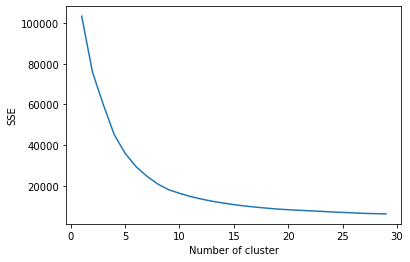

In [24]:
sse = {}
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=172).fit(normalized_RFM_df)
    print('Number of cluster :',k)
    sse[k] = kmeans.inertia_ 
    print('sum of squared estimate of errors :',sse[k])
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [25]:
kmeans2 = KMeans(n_clusters=8, max_iter=1000,random_state=172).fit(normalized_RFM_df)
k2_lab = kmeans2.labels_
k2_centers = kmeans2.cluster_centers_
print('Cluster centers')
print(k2_centers)

#normalized_RFM_df['label']=k2_lab 

Cluster centers
[[  1.72247421  -0.4320932   -0.08618688]
 [ -0.76250294  -0.09215548  -0.15888278]
 [  0.08196089   0.06171759   2.56678034]
 [ -1.16826094 121.31908783  -0.24323858]
 [ -0.75507118   1.46966439   0.05160871]
 [  0.30219689  -0.24189242  -0.18940105]
 [  0.40742001  -0.36034153  86.46206727]
 [  0.59770089  -0.20442929   8.34514775]]


## K-means with remove Outliers 

In [26]:
print('For R')
print('5% quantile:',RFM_df['R'].quantile(0.05),'|','95% quantile:',RFM_df['R'].quantile(0.95))
print('===========')
print('For F')
print('5% quantile:',RFM_df['F'].quantile(0.05),'|','95% quantile:',RFM_df['F'].quantile(0.95))
print('===========')
print('For M')
print('5% quantile:',RFM_df['M'].quantile(0.05),'|','95% quantile:',RFM_df['M'].quantile(0.95))

For R
5% quantile: 235.0 | 95% quantile: 1181.0
For F
5% quantile: 2.0 | 95% quantile: 26.0
For M
5% quantile: -0.6380807320984321 | 95% quantile: 1.1315007359390112


In [27]:
R_in=((RFM_df['R']>=RFM_df['R'].quantile(0.05)) & (RFM_df['R']<=RFM_df['R'].quantile(0.95)))
R_in.value_counts()

True     31081
False     3400
Name: R, dtype: int64

In [28]:
F_in=((RFM_df['F']>=RFM_df['F'].quantile(0.05)) & (RFM_df['F']<=RFM_df['F'].quantile(0.95)))
F_in.value_counts()

True     31594
False     2887
Name: F, dtype: int64

In [29]:
M_in=((RFM_df['M']>=RFM_df['M'].quantile(0.05)) & (RFM_df['M']<=RFM_df['M'].quantile(0.95)))
M_in.value_counts()

True     31033
False     3448
Name: M, dtype: int64

In [30]:
in_row = (R_in & F_in & M_in)
in_row.value_counts()

True     25708
False     8773
dtype: int64

In [31]:
ro_RFM_df = RFM_df[in_row]
ro_RFM_df

,R,F,M
Customer code,,,
353,235,11,0.274576
1072,426,3,-0.333062
1076,246,2,-0.230930
1080,356,23,-0.085600
1091,333,11,-0.510055
...,...,...,...
209426,235,4,0.006452
209443,237,2,-0.498428
209454,237,2,-0.498428


In [32]:
ro_RFM_df.describe()

,R,F,M
count,25708.000000,25708.000000,25708.000000
mean,553.076863,8.518243,-0.187891
std,256.531568,5.987463,0.328267
min,235.000000,2.000000,-0.638081
25%,339.000000,3.000000,-0.421870
50%,490.000000,7.000000,-0.265242
75%,706.000000,12.000000,-0.065914
max,1181.000000,26.000000,1.131501


Number of cluster : 1
sum of squared estimate of errors : 1692662068.7216492
Number of cluster : 2
sum of squared estimate of errors : 463069978.021821
Number of cluster : 3
sum of squared estimate of errors : 181837527.88410926
Number of cluster : 4
sum of squared estimate of errors : 109631150.24795616
Number of cluster : 5
sum of squared estimate of errors : 67700138.13577472
Number of cluster : 6
sum of squared estimate of errors : 48683165.81446357
Number of cluster : 7
sum of squared estimate of errors : 35032735.060611725
Number of cluster : 8
sum of squared estimate of errors : 27497925.369534355
Number of cluster : 9
sum of squared estimate of errors : 21347475.957059737
Number of cluster : 10
sum of squared estimate of errors : 17405950.19322657
Number of cluster : 11
sum of squared estimate of errors : 14773959.294199608
Number of cluster : 12
sum of squared estimate of errors : 12453703.633191006
Number of cluster : 13
sum of squared estimate of errors : 10710620.749710336


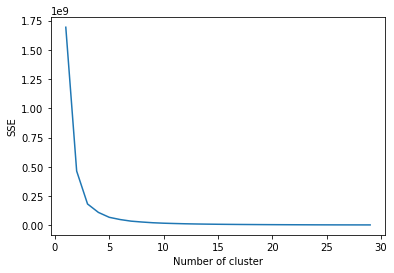

In [33]:
sse = {}
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=172).fit(ro_RFM_df)
    print('Number of cluster :',k)
    sse[k] = kmeans.inertia_ 
    print('sum of squared estimate of errors :',sse[k])
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [34]:
kmeans3 = KMeans(n_clusters=3, max_iter=1000,random_state=172).fit(ro_RFM_df)

k3_lab = kmeans3.labels_
k3_centers = kmeans3.cluster_centers_
print('Cluster centers')
print(k3_centers)

Cluster centers
[[989.23257288   5.09505703  -0.13926669]
 [627.81512503   7.48397669  -0.22164418]
 [342.61400754  10.45964196  -0.18413163]]


## K-means with remove Outliers and normalized

In [35]:
normalized_ro_RFM_df=((ro_RFM_df-ro_RFM_df.mean())/ro_RFM_df.std())
normalized_ro_RFM_df

,R,F,M
Customer code,,,
353,-1.239913,0.414492,1.408815
1072,-0.495365,-0.921633,-0.442237
1076,-1.197033,-1.088649,-0.131112
1080,-0.768236,2.418680,0.311608
1091,-0.857894,0.414492,-0.981412
...,...,...,...
209426,-1.239913,-0.754617,0.592026
209443,-1.232117,-1.088649,-0.945991
209454,-1.232117,-1.088649,-0.945991


In [36]:
normalized_ro_RFM_df.describe()

,R,F,M
count,2.570800e+04,2.570800e+04,2.570800e+04
mean,-4.151400e-15,2.647969e-15,8.528010e-15
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.239913e+00,-1.088649e+00,-1.371416e+00
25%,-8.345049e-01,-9.216330e-01,-7.127717e-01
50%,-2.458834e-01,-2.535704e-01,-2.356346e-01
75%,5.961182e-01,5.815079e-01,3.715784e-01
max,2.447742e+00,2.919727e+00,4.019268e+00


Number of cluster : 1
sum of squared estimate of errors : 77120.99999999639
Number of cluster : 2
sum of squared estimate of errors : 53459.12659243578
Number of cluster : 3
sum of squared estimate of errors : 38994.66493591178
Number of cluster : 4
sum of squared estimate of errors : 28579.043531598363
Number of cluster : 5
sum of squared estimate of errors : 25040.78860851859
Number of cluster : 6
sum of squared estimate of errors : 22381.068109618307
Number of cluster : 7
sum of squared estimate of errors : 19914.141666528136
Number of cluster : 8
sum of squared estimate of errors : 17800.371213192237
Number of cluster : 9
sum of squared estimate of errors : 16355.475563879156
Number of cluster : 10
sum of squared estimate of errors : 15138.704708484236
Number of cluster : 11
sum of squared estimate of errors : 14216.70746744239
Number of cluster : 12
sum of squared estimate of errors : 13461.668163027582
Number of cluster : 13
sum of squared estimate of errors : 12713.201975149766


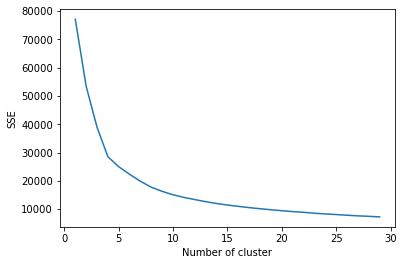

In [37]:
sse = {}
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=172).fit(normalized_ro_RFM_df)
    #normalized_RFM_df["clusters"] = kmeans.labels_
    print('Number of cluster :',k)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    print('sum of squared estimate of errors :',sse[k])
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [38]:
kmeans4 = KMeans(n_clusters=4, max_iter=1000,random_state=172).fit(normalized_ro_RFM_df)

k4_lab = kmeans4.labels_
k4_centers = kmeans4.cluster_centers_
print('Cluster centers')
print(k4_centers)


Cluster centers
[[ 1.43181376 -0.63481642 -0.15543177]
 [-0.43297717 -0.49222626 -0.43017127]
 [-0.08690648  0.29651996  2.11338014]
 [-0.60421756  1.36919812 -0.12705205]]


# Summary

## K-means

In [39]:
print('Mean of RFM:')
print(RFM_df.mean(),'\n')
print('Cluster centers:')
print(k1_centers,'\n')
print('RFM Data with labels')
RFM_Kmeans=RFM_df.copy()
RFM_Kmeans['labels']=k1_lab
print(RFM_Kmeans)
RFM_Kmeans.to_csv(os.path.join(root,'RFM_Kmeans.csv'),index=True)

Mean of RFM:
R    567.214669
F      9.545750
M     -0.037446
dtype: float64 

Cluster centers:
[[1073.67778609    4.41106956    0.07154177]
 [ 329.24618026   12.61453505   -0.06259136]
 [ 642.09049511    7.67561283   -0.06546251]] 

RFM Data with labels
                  R     F         M  labels
Customer code                              
2               218  1540 -0.312679       1
353             235    11  0.274576       1
412             341     1 -0.220708       1
1067           1226     3  0.183986       0
1072            426     3 -0.333062       1
...             ...   ...       ...     ...
209788          221     3 -0.545189       1
209821          217     2 -0.498428       1
209850          217     1 -0.021952       1
209851          569     1 -0.101221       2
209973          236     2 -0.498416       1

[34481 rows x 4 columns]


## K-means with normalized data

In [40]:
print('Mean of RFM:')
print(normalized_RFM_df.mean(), '\n')
print('Cluster centers:')
print(k2_centers)

Mean of RFM:
R    1.201215e-15
F    7.628402e-15
M    5.671745e-16
dtype: float64 

Cluster centers:
[[  1.72247421  -0.4320932   -0.08618688]
 [ -0.76250294  -0.09215548  -0.15888278]
 [  0.08196089   0.06171759   2.56678034]
 [ -1.16826094 121.31908783  -0.24323858]
 [ -0.75507118   1.46966439   0.05160871]
 [  0.30219689  -0.24189242  -0.18940105]
 [  0.40742001  -0.36034153  86.46206727]
 [  0.59770089  -0.20442929   8.34514775]]


In [41]:
print('Denormalized Mean of RFM:')
print(RFM_df.mean(),'\n')
print('Denormalized Cluster centers:')
print(k2_centers*RFM_df.std().to_numpy()+RFM_df.mean().to_numpy(),'\n')
print('RFM Data with labels')
RFM_Kmeans_nor=RFM_df.copy()
RFM_Kmeans_nor['labels']=k2_lab
print(RFM_Kmeans_nor)
RFM_Kmeans_nor.to_csv(os.path.join(root,'RFM_Kmeans_nor.csv'),index=True)


Denormalized Mean of RFM:
R    567.214669
F      9.545750
M     -0.037446
dtype: float64 

Denormalized Cluster centers:
[[1082.0938716     4.09484436   -0.13496922]
 [ 339.28852293    8.38319791   -0.2172272 ]
 [ 591.71428571   10.32432432    2.86695697]
 [ 218.         1540.           -0.31267877]
 [ 341.51001466   28.08573522    0.02095136]
 [ 657.546875      6.49424913   -0.2517597 ]
 [ 689.            5.           97.79743996]
 [ 745.87845304    6.96685083    9.40538398]] 

RFM Data with labels
                  R     F         M  labels
Customer code                              
2               218  1540 -0.312679       3
353             235    11  0.274576       1
412             341     1 -0.220708       1
1067           1226     3  0.183986       0
1072            426     3 -0.333062       1
...             ...   ...       ...     ...
209788          221     3 -0.545189       1
209821          217     2 -0.498428       1
209850          217     1 -0.021952       1
209851     

## K-means with removed Outliers 

In [42]:
print('Mean of RFM:')
print(np.around(ro_RFM_df.mean(),decimals=4), '\n')
print('Cluster centers:')
print(k3_centers,'\n')
print('RFM Data with labels')
RFM_Kmeans_ro=ro_RFM_df.copy()
RFM_Kmeans_ro['labels']=k3_lab
print(RFM_Kmeans_ro)
RFM_Kmeans_ro.to_csv(os.path.join(root,'RFM_Kmeans_ro.csv'),index=True)

Mean of RFM:
R    553.0769
F      8.5182
M     -0.1879
dtype: float64 

Cluster centers:
[[989.23257288   5.09505703  -0.13926669]
 [627.81512503   7.48397669  -0.22164418]
 [342.61400754  10.45964196  -0.18413163]] 

RFM Data with labels
                 R   F         M  labels
Customer code                           
353            235  11  0.274576       2
1072           426   3 -0.333062       2
1076           246   2 -0.230930       2
1080           356  23 -0.085600       2
1091           333  11 -0.510055       2
...            ...  ..       ...     ...
209426         235   4  0.006452       2
209443         237   2 -0.498428       2
209454         237   2 -0.498428       2
209485         235   2 -0.489801       2
209973         236   2 -0.498416       2

[25708 rows x 4 columns]


## K-means with removed Outliers and normalized

In [43]:
print('Mean of RFM:')
print(normalized_ro_RFM_df.mean(), '\n')
print('Cluster centers:')
print(np.around(k4_centers,decimals=4))

Mean of RFM:
R   -4.151400e-15
F    2.647969e-15
M    8.528010e-15
dtype: float64 

Cluster centers:
[[ 1.4318 -0.6348 -0.1554]
 [-0.433  -0.4922 -0.4302]
 [-0.0869  0.2965  2.1134]
 [-0.6042  1.3692 -0.1271]]


In [44]:
print('Denormalized Mean of RFM:')
print(ro_RFM_df.mean(),'\n')
print('Denormalized Cluster centers:')
print(k4_centers*ro_RFM_df.std().to_numpy()+ro_RFM_df.mean().to_numpy(),'\n')
print('RFM Data with labels')
RFM_Kmeans_ro_nor = ro_RFM_df.copy()
RFM_Kmeans_ro_nor['labels']=k4_lab
print(RFM_Kmeans_ro_nor)
RFM_Kmeans_ro_nor.to_csv(os.path.join(root,'RFM_Kmeans_ro_nor.csv'),index=True)

Denormalized Mean of RFM:
R    553.076863
F      8.518243
M     -0.187891
dtype: float64 

Denormalized Cluster centers:
[[920.38229376   4.71730382  -0.23891374]
 [442.00455137   5.57105703  -0.32910154]
 [530.7826087   10.29364548   0.50586142]
 [398.0759853   16.71626587  -0.22959763]] 

RFM Data with labels
                 R   F         M  labels
Customer code                           
353            235  11  0.274576       2
1072           426   3 -0.333062       1
1076           246   2 -0.230930       1
1080           356  23 -0.085600       3
1091           333  11 -0.510055       1
...            ...  ..       ...     ...
209426         235   4  0.006452       1
209443         237   2 -0.498428       1
209454         237   2 -0.498428       1
209485         235   2 -0.489801       1
209973         236   2 -0.498416       1

[25708 rows x 4 columns]
